#### GitHub 
https://github.com/youngseo0526/Deep-Learning

### Load package

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### MNIST train, test dataset 가져오기

In [3]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("",train=True, transform=transforms.ToTensor(), target_transform=None, download=True) # train 용으로 쓰겠다.
mnist_test=dset.MNIST("",train=False, transform=transforms.ToTensor(),target_transform=None,download=True) # test 용으로 쓰겠다.


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


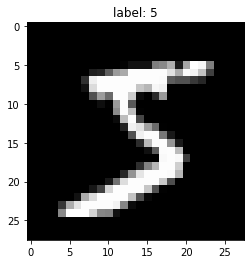

In [4]:
print ("mnist_train 길이:", len(mnist_train))
print ("mnist_test 길이:", len(mnist_test))

# 데이터 하나 형태
image, label=mnist_train.__getitem__(0)
print ("image data 형태:", image.size())
print ("label: ", label)

# 그리기
img=image.numpy() #image 타입을 numpy로 변환(1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

### MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


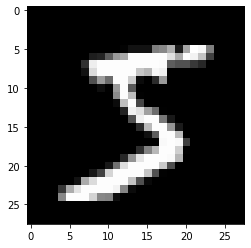

0


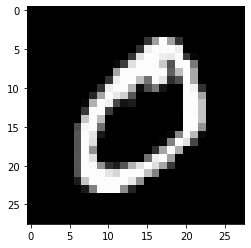

4


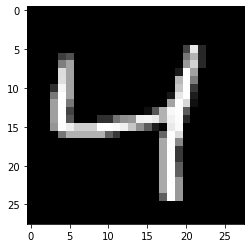

In [5]:
print(mnist_train[0][1])  # label
print(mnist_train[0][0].size())  # image

for i in range(3):
    img= mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

### convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


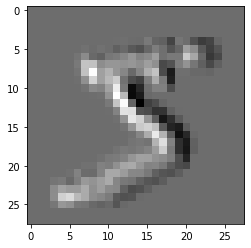

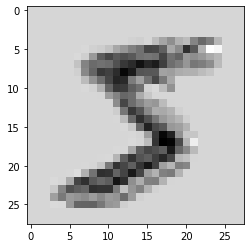

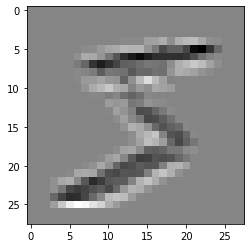

In [6]:
# mnist의 첫 번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
# view : tensor 의 사이즈 조절. -1 : 해당 차원 확장시켜라
# [1, 28, 28] -> [1, 1, 28, 28]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print (label)

# convolutional filter 정의
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
# image에 filter 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap= 'gray')
    plt.show()

### CNN 만들기
**train, test data 가져오기**

In [20]:
import numpy as np
import torch.optim as optim

batch_size= 16
learning_rate= 0.0002
num_epoch= 10 # 1000

In [21]:
# 후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader= torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size= batch_size, # mnist_train을 train
                                         shuffle= True, num_workers=2,
                                         drop_last= True)  # batch_szie 만큼 나눌 때 나머지는 버려라
test_loader= torch.utils.data.DataLoader((mnist_test), batch_size= batch_size,
                                         shuffle= False, num_workers=2,
                                         drop_last= True)

### CNN 클래스 만들기 (모델 만들기)

In [23]:
class CNN(nn.Module):  # nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__()  # 28x28
        self.layer= nn.Sequential(
            nn.Conv2d(1, 16, 5, padding= 2),
            nn.ReLU(),
        
            nn.Conv2d(16, 32, 5, padding= 2),  # 28x28
            nn.ReLU(),
            nn.MaxPool2d(2,2),  # 28x28 -> 14x14
        
            nn.Conv2d(32, 64, 5, padding= 2),  # 14x14
            nn.ReLU(),
            nn.MaxPool2d(2,2)  # 14x14 -> 7x7
        )
        self.fc_layer= nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out= self.layer(x)
        out= out.view(batch_size, -1)
        out= self.fc_layer(out)
        return out
    
model= CNN().cuda()

In [24]:
# 파라미터 체크하기
for parameter in model.parameters():
    print(parameter)
    print(parameter.shape)

Parameter containing:
tensor([[[[-0.0932, -0.1843,  0.0927, -0.0392,  0.1508],
          [-0.0101, -0.0404,  0.0849,  0.0614,  0.0180],
          [ 0.1860,  0.0129,  0.1459,  0.1119,  0.0508],
          [-0.1235, -0.1512, -0.0516,  0.0232,  0.0825],
          [-0.1270, -0.0560,  0.1010,  0.1779, -0.0259]]],


        [[[ 0.0937,  0.1202,  0.1451,  0.1682,  0.0963],
          [ 0.0032,  0.1494,  0.1988,  0.1525, -0.1886],
          [-0.0441,  0.0326,  0.0693,  0.1224, -0.0647],
          [-0.0850, -0.1713,  0.0426, -0.0367, -0.1251],
          [ 0.0962, -0.1234, -0.1193, -0.1616, -0.1661]]],


        [[[-0.1682,  0.1084,  0.0477,  0.1472,  0.1889],
          [-0.1978,  0.0591,  0.1380, -0.1280, -0.0592],
          [-0.0894, -0.0346,  0.1470, -0.0867,  0.1892],
          [ 0.1197,  0.1514, -0.0887,  0.0863,  0.1838],
          [ 0.1491,  0.1583, -0.0138,  0.1777,  0.0717]]],


        [[[ 0.1516,  0.1945, -0.0769, -0.0936, -0.1729],
          [ 0.1593, -0.1403,  0.0265,  0.0645,  0.1143

In [25]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### optimization

In [26]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader): # batch_size 만큼
        x=Variable(image).cuda()
        y_=Variable(label).cuda()
        
        optimizer.zero_grad()  # optimizer 안에서 이전 gradient 들을 초기화
        output=model.forward(x)
        loss=loss_func(output, y_) # 예측값, 정답
        loss.backward()  # gradient 계산
        optimizer.step()  # parameter 업데이트
        
        if j%50==0:
            print(loss, j, i)

tensor(2.3001, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(1.3337, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.4545, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.9752, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.5698, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.4894, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.1294, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.2996, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.1097, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.1933, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.2166, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.0849, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.1143, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0806, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.0936, device='cuda:0', grad_fn=<NllLoss

In [27]:
# 모델 저장시키기
torch.save(model, 'mycnn_model_%d.pkl'%(num_epoch))

In [32]:
try:
  # 미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함.
  model=torch.load('mycnn_model_10.pkl')
  print("model restored")
except:
  print("model not restored")

model restored


In [35]:
def ComputeAccr(dloader, imodel):
    correct= 0
    total= 0
    
    for j, [imgs, labels] in enumerate(dloader):  #batch_size 만큼
        img=Variable(imgs).cuda() # x
        label=Variable(labels).cuda()
        
        output=imodel.forward(img)  # forward prop.
        _, output_index=torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [36]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.57999420166016
